### Miles Tweed
# Assignment 2

## Import statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from scipy.optimize import fsolve

### Question 1

Consider the following python script:

In [2]:
#swap function for exchanging two list entries

def swap(A, i, j):
    A[i],A[j] = A[j],A[i]  #<---- This occurs in constant time
    return A

In [8]:
# input list
A = [1,2,3,4,5,10,9,8,7,6]
A2 = [10,9,8,7,6,5,4,3,2,1]  #worst case scenario

In [4]:
def swapsort(A):
    n = 0
    for j in range(len(A)):   #<---- This occurs n times
        n += 1 # Set j
        for k in range(len(A)-1, j, -1):   #<---- This occurs at most n-1 times
            n += 2 # Set k and check if
            if A[k] < A[k-1]:   #<---- This occurs in constant time
                n += 1 # Swap
                swap(A,k,k-1)   #<---- This occurs in constant time
    return A, n

In [5]:
swapsort(A)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 110)

In [6]:
swapsort(A2)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 145)

#### a) What does the program/algorithm do?

* This is a sorting algorithm.  It contains two for loops that iterate over the array.  The first loop simply places a pointer that moves over the entire array (j). This pointer also sets up the loop invariant because of the action of the second loop.  The second loop aways starts by pointing at the (n)th position and iterates over the array in reverse order.  It compares the value at the pointers index position (k) with the values at the (k-1)th position and swaps them if array[k] < array[k-1].  The reason that this ensures the loop invariant is that, since the final k-1 position that is checked will always be the jth position and the second loop checks the entire array[j...n], array[0...j] will always conatain the lowest values in increasing order.


* For the specific example of running the algorithm on list A, on the first iteration of the outer (j) loop, the value 6 will be swapped at every interation of the inner (k) loop until the k-1 value is 5 after which the inner loop will do nothing except iterate until k = j+1. Next, the outer loop will iterate to 2 and the inner loop will swap the values 7 on every iteration until th k-1 value is 6 after which the inner loop will do nothing except iterate until k = j+1. This will be repeated for the next two iteration, moving the value 8 and 9 respectively, and the list will now me in order and the j pointer will be on the value 5.  Afterwards, the two loops will simply iterate without action until they terminate.

#### b) How does the runtime of the algorithm scale on inputs of increasing size?
    
* I estimated the worst case runtime growth rate of the algorithm to be $\theta(n^2)$.  This is because the first loop iterates over the entire array while the inner nestedfor loop iterates over the array at most (n-1) times and (n-j) times after that.

$$\sum_{j=0}^n\sum_{k=0}^{j-1}2 = 2\sum_{j=0}^{n}j-1 = 2\left(\sum_{j=0}^{n}j-\sum_{j=0}^{n}1\right)=2\left(\frac{n(n-1)}{2}-n\right)=n(n-1)-2n=n^2-3n=\theta(n^2)$$

#### c) Using python's random library, generate 1000 lists of length  20. Compute the average runtime of the algorithm for yout 1000 lists. Repeat this for lists of size all integer multiples of 20 up to size 800 to obtain a function defined on 40 inputs (i.e. the average runtime for each collection of lists).

In [240]:
averages = {}
for i in range(1,41):
    test_list = [[randint(1,100) for x in range((i*20))] for x in range(1000)]
    step_counts = []
    for j in range(1000):
        sortedTL = swapsort(test_list[j])
        step_counts.append(sortedTL[1])
    averages['{}'.format(i*20)] = sum(step_counts)/1000
averages

{'20': 494.324,
 '40': 1987.719,
 '60': 4472.632,
 '80': 7965.956,
 '100': 12441.058,
 '120': 17936.989,
 '140': 24418.798,
 '160': 31893.134,
 '180': 40380.495,
 '200': 49821.716,
 '220': 60345.975,
 '240': 71801.473,
 '260': 84299.276,
 '280': 97746.322,
 '300': 112222.357,
 '320': 127634.684,
 '340': 144149.218,
 '360': 161575.953,
 '380': 179991.543,
 '400': 199477.508,
 '420': 219915.73,
 '440': 241448.235,
 '460': 263830.308,
 '480': 287326.614,
 '500': 311755.374,
 '520': 337296.951,
 '540': 363525.997,
 '560': 391047.437,
 '580': 419425.52,
 '600': 449008.576,
 '620': 479428.499,
 '640': 510769.333,
 '660': 542986.104,
 '680': 576809.083,
 '700': 610936.618,
 '720': 646530.981,
 '740': 682826.972,
 '760': 720515.43,
 '780': 758736.836,
 '800': 798323.14}

#### d) Use matplotlib to plot the values with appropriate scales for the axes. Save your plot as a pdf.
* Looking at the plot of the function of runtime versus input array size, the growth rate seem to be $\theta(n^2)$ on average.

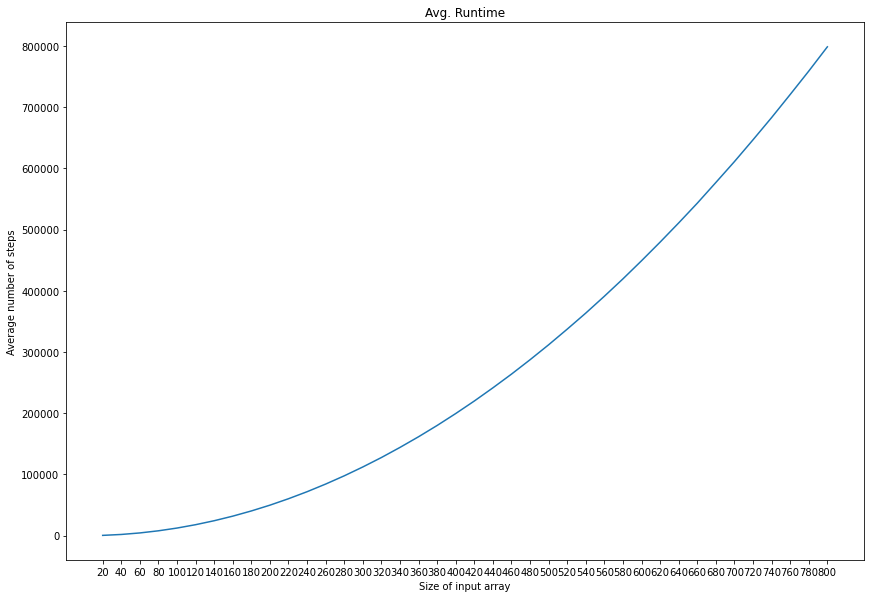

In [241]:
plt.figure(figsize = (12,8))
plt.plot(list(averages.keys()), list(averages.values()))
plt.tight_layout(w_pad = 4)
plt.yscale('linear')
plt.title('Avg. Runtime')
plt.ylabel('Average number of steps')
plt.xlabel('Size of input array')
plt.savefig('average_runtime_plot.pdf')

### Question 2

Let $R1(n) = 4n^2 + n$ and $R2(n) = 64n\log_2(n) + 2n$:

#### a) Plot both functions using matplotlib and save your plot as a pdf.

In [2]:
X = np.linspace(1,400,400)

In [3]:
y1 = [4*x**2 + x for x in X]
y2 = [64*x*np.log2(x)+2*x for x in X]

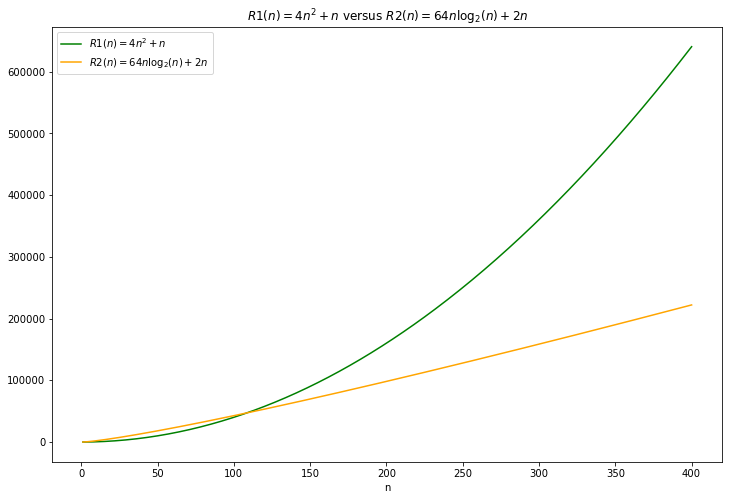

In [14]:
plt.figure(figsize = (12,8))
plt.plot(X,y1,color = 'green',label = '$R1(n) = 4n^2+n$')
plt.plot(X,y2,color = 'orange', label = '$R2(n) = 64n\log_2(n)+2n$')
plt.legend()
plt.title('$R1(n) = 4n^2 + n$ versus $R2(n) = 64n\log_2(n) + 2n$')
plt.xlabel('n')
plt.xscale('linear')
plt.yscale('linear')
plt.savefig('two_function_graph.pdf')

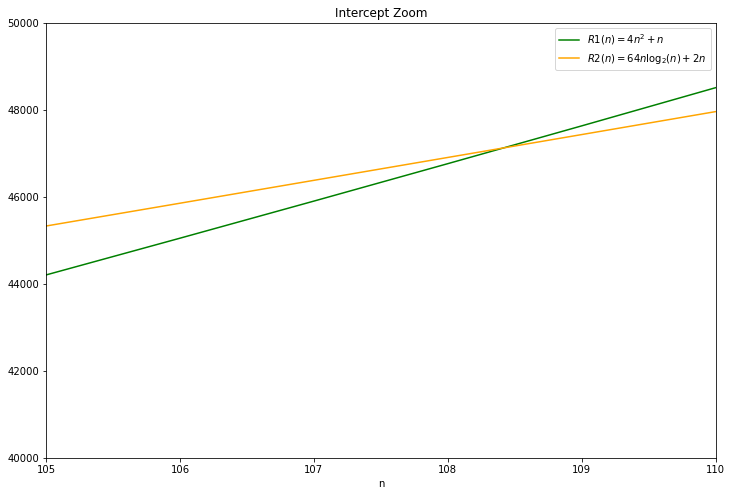

In [15]:
plt.figure(figsize = (12,8))
plt.plot(X,y1,color = 'green',label = '$R1(n) = 4n^2+n$')
plt.plot(X,y2,color = 'orange', label = '$R2(n) = 64n\log_2(n)+2n$')
plt.legend()
plt.title('Intercept Zoom')
plt.xlabel('n')
plt.xlim(105,110)
plt.ylim(40000,50000)
plt.xscale('linear')
plt.yscale('linear')

#### b) Use python libraries to extimate where the plots intersect.
* I will be using the fsolve funtion in the scipy.optimize library.  This function required an initial guess for the whereabouts of the intersection. Looking at the plot of the two functions together, I am estimating this intersection to occur around n=108 with an output of approximately 46,000.

In [16]:
def f(xy):
    x, y = xy
    z = np.array([4*x**2 + x-y, 4*x**2 + x-y])
    return z

root = fsolve(f, [108,46000])
root

array([  108.30016028, 47023.99902367])

* It seem that my initial guess was very close to the true value.  I will run numpy's isclose function which will return true if the resulting values are identical within the given tolerance [0.0, 0.0].

In [17]:
np.isclose(f(root), [0.0, 0.0])

array([ True,  True])

#### c) Make as many statements about the asymptotic order on the function as the plot allows.
* At $n \le 111$, $R1(n)$ grows more slowly that $R1(n)$.
* For $n \gt 111$ $R1(n)$ grows much more quickly than $R2(n)$.
* Considering the asymptotic characteristics:
$$\lim_{n\rightarrow\infty}\frac{R2(n)}{R1(n)} = \lim_{n\rightarrow\infty}\frac{64n\log_2(n)+2n}{4n^2+n} = \lim_{n\rightarrow\infty}\frac{16\log_2(n)+\frac{1}{2}}{n+1} = \lim_{n\rightarrow\infty}\frac{16\frac{\ln(n)}{\ln(2)}+\frac{1}{2}}{n+1} \stackrel{\text{H}}{=} \lim_{n\rightarrow\infty}\frac{16}{n\ln(2)} = 0$$
> $\therefore R2 = \text{o}(R1)$  or  $R1 = \omega(R2)$

### Question 3

Consider the following list of functions:

$f1(n) = n^2$

$f2(n) = \sqrt{n}$

$f3(n) = 2^n$

$f4(n) = \log_2(n)$

$f5(n) = (\frac{1}{2})^n$

$f6(n) = n\log_2(n)$

$f7(n) = n$

$f8(n) = n^3$

#### a) Use matplotlib to plot pairs of these functions (there are 28 possibilities). Study pairs to understand relative size.

In [247]:
X = np.linspace(1,100,100)

In [248]:
y1 = [x**2 for x in X]
y2 = [np.sqrt(x) for x in X]
y3 = [2**x for x in X]
y4 = [np.log2(x) for x in X]
y5 = [(1/2)**x for x in X]
y6 = [x*np.log2(x) for x in X]
y7 = [x for x in X]
y8 = [x**3 for x in X]

Text(0.5, 1.0, 'Two Function Comparison')

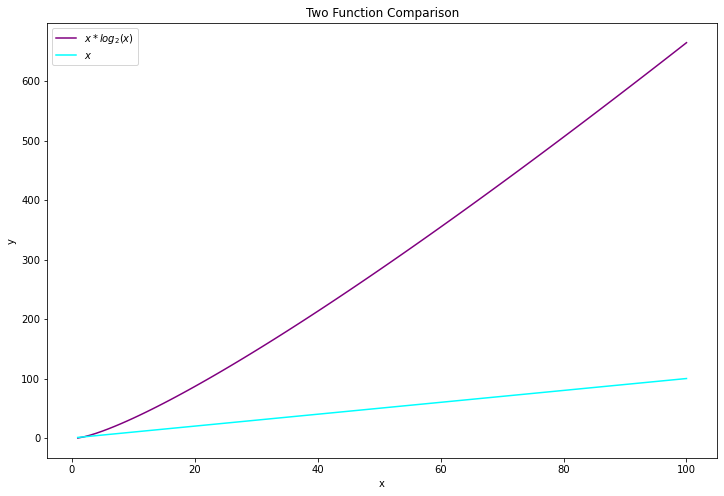

In [249]:
plt.figure(figsize=(12,8))
                                                            ##ranked from of fastest to slowest##
#plt.plot(X,y1,color = 'blue', label = '$x^2$')              # x^2       <---3rd
#plt.plot(X,y2,color = 'green', label = '$\sqrt{x}$')        # sqrt(x)   <---6th  *tie with 7th*
#plt.plot(X,y3,color = 'red', label = '$2^x$')               # 2^x       <---1st
#plt.plot(X,y4,color = 'maroon', label = '$\log_2(x)$')      # lg(x)     <---7th  *tie with 6th*
#plt.plot(X,y5,color = 'orange', label = '$(1/2)^x$')        # (1/2)^x   <---8th
plt.plot(X,y6,color = 'purple', label = '$x*log_2(x)$')     # x*lg(x)   <---4th
plt.plot(X,y7,color = 'cyan', label = '$x$')                # x         <---5th
#plt.plot(X,y8,color = 'magenta', label = '$x^3$')           # x^3       <---2nd

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.title("Two Function Comparison")
#plt.savefig('two_function_comp_28.pdf')  #All pair plots were saved to pdf

#### b) Provide the minimal 7 plots that illustrate the increasing asymptotic order of the 8 functions.

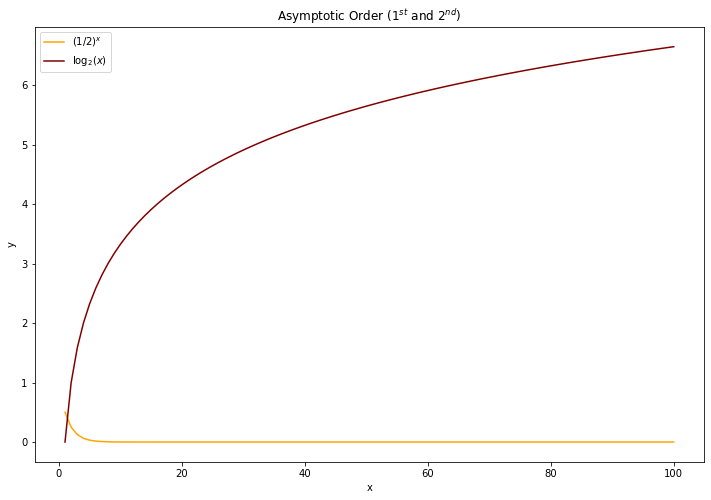

In [250]:
plt.figure(figsize=(12,8))

plt.plot(X,y5,color = 'orange', label = '$(1/2)^x$')        # (1/2)^x   <--- 1st slowest
plt.plot(X,y4,color = 'maroon', label = '$\log_2(x)$')      # lg(x)     <--- 2nd slowest

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.title("Asymptotic Order ($1^{st}$ and $2^{nd}$)")
plt.savefig('Asym_order_1.pdf')

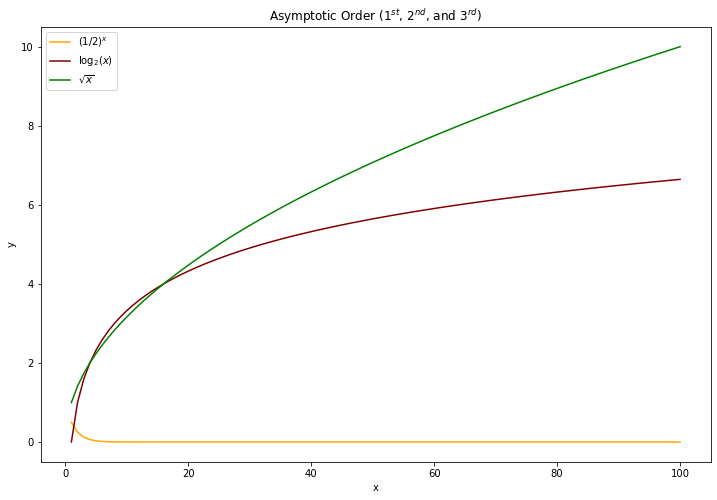

In [251]:
plt.figure(figsize=(12,8))

plt.plot(X,y5,color = 'orange', label = '$(1/2)^x$')        # (1/2)^x   <---1st slowest
plt.plot(X,y4,color = 'maroon', label = '$\log_2(x)$')      # lg(x)     <---2nd slowest
plt.plot(X,y2,color = 'green', label = '$\sqrt{x}$')        # sqrt(x)   <---3rd slowest

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.title("Asymptotic Order ($1^{st}$, $2^{nd}$, and $3^{rd}$)")
plt.savefig('Asym_order_2.pdf')

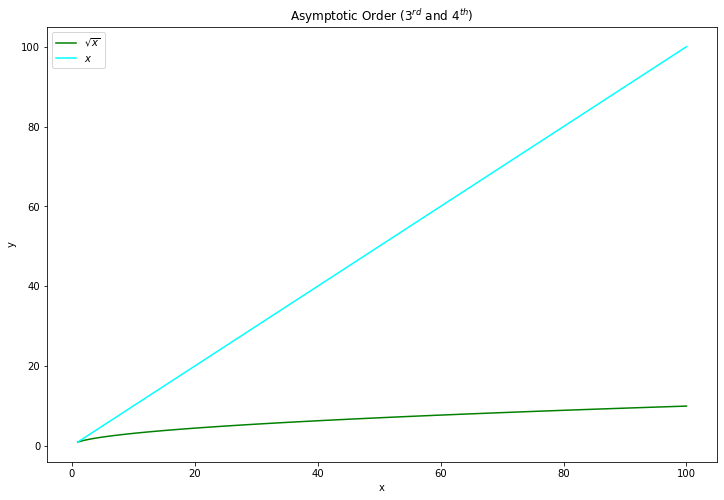

In [252]:
plt.figure(figsize=(12,8))

plt.plot(X,y2,color = 'green', label = '$\sqrt{x}$')        # sqrt(x)   <---3rd slowest
plt.plot(X,y7,color = 'cyan', label = '$x$')                # x         <---4th slowest

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.title("Asymptotic Order ($3^{rd}$ and $4^{th}$)")
plt.savefig('Asym_order_3.pdf')

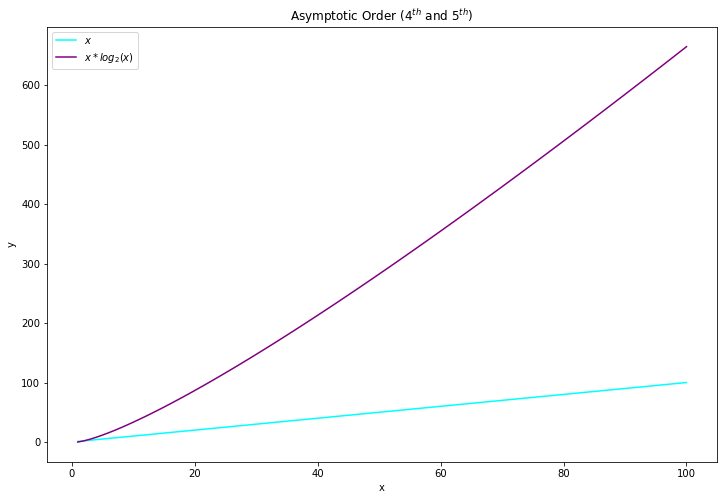

In [253]:
plt.figure(figsize=(12,8))

plt.plot(X,y7,color = 'cyan', label = '$x$')                # x         <---4th slowest
plt.plot(X,y6,color = 'purple', label = '$x*log_2(x)$')     # x*lg(x)   <---5th slowest

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.title("Asymptotic Order ($4^{th}$ and $5^{th}$)")
plt.savefig('Asym_order_4.pdf')

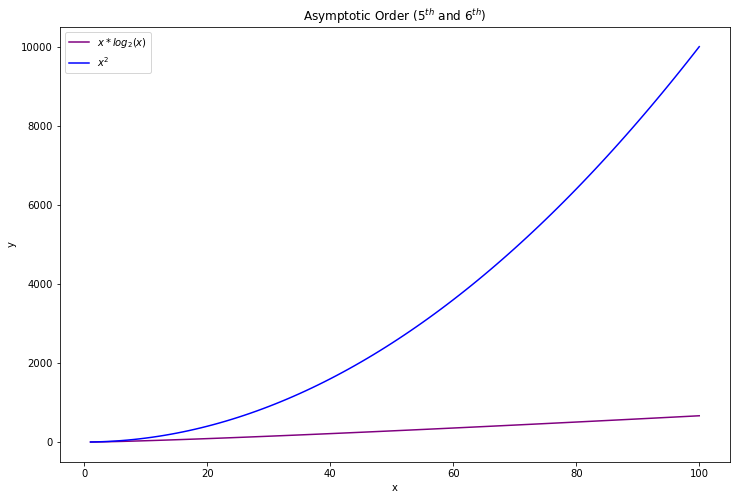

In [254]:
plt.figure(figsize=(12,8))

plt.plot(X,y6,color = 'purple', label = '$x*log_2(x)$')     # x*lg(x)   <---5th slowest
plt.plot(X,y1,color = 'blue', label = '$x^2$')              # x^2       <---6th slowest

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.title("Asymptotic Order ($5^{th}$ and $6^{th}$)")
plt.savefig('Asym_order_5.pdf')

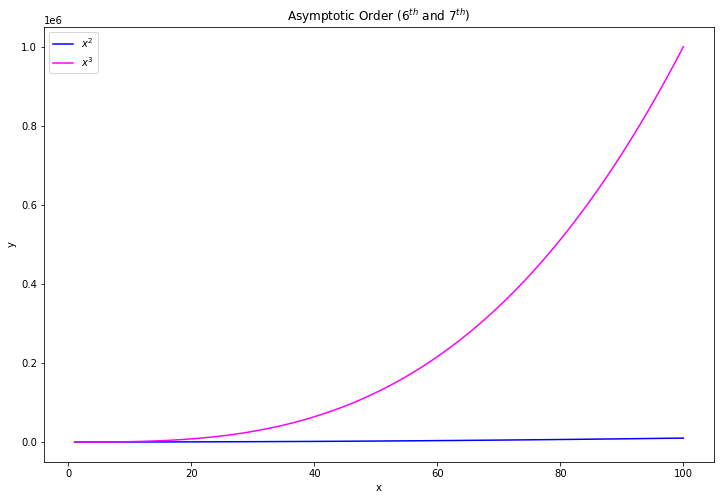

In [255]:
plt.figure(figsize=(12,8))

plt.plot(X,y1,color = 'blue', label = '$x^2$')              # x^2       <---6th slowest
plt.plot(X,y8,color = 'magenta', label = '$x^3$')           # x^3       <---7th slowest

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.title("Asymptotic Order ($6^{th}$ and $7^{th}$)")
plt.savefig('Asym_order_6.pdf')

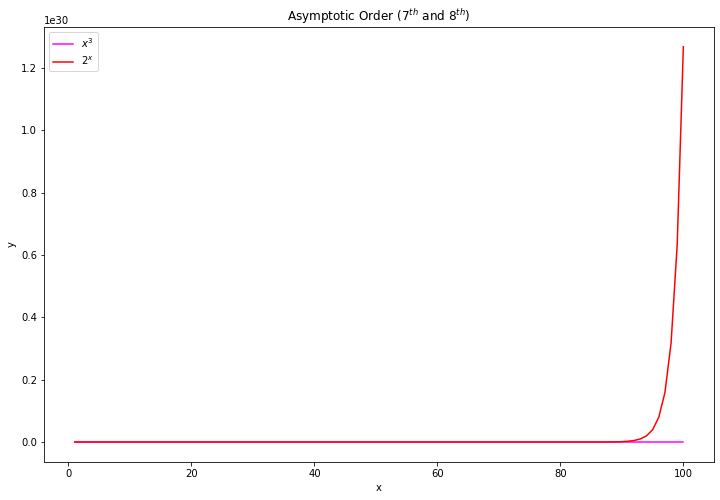

In [256]:
plt.figure(figsize=(12,8))

plt.plot(X,y8,color = 'magenta', label = '$x^3$')           # x^3       <---7th slowest
plt.plot(X,y3,color = 'red', label = '$2^x$')               # 2^x       <---8th slowest

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.yscale('linear')
plt.xscale('linear')
plt.title("Asymptotic Order ($7^{th}$ and $8^{th}$)")
plt.savefig('Asym_order_7.pdf')